<a href="https://colab.research.google.com/github/SanjaraT/House-Price-Prediction/blob/main/HousePricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING DATASET

In [25]:
trainDf = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')
testDf = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

#trainDf.head()
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Summary statistics of numerical columns

In [26]:
trainDf.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#VISUALIZATION

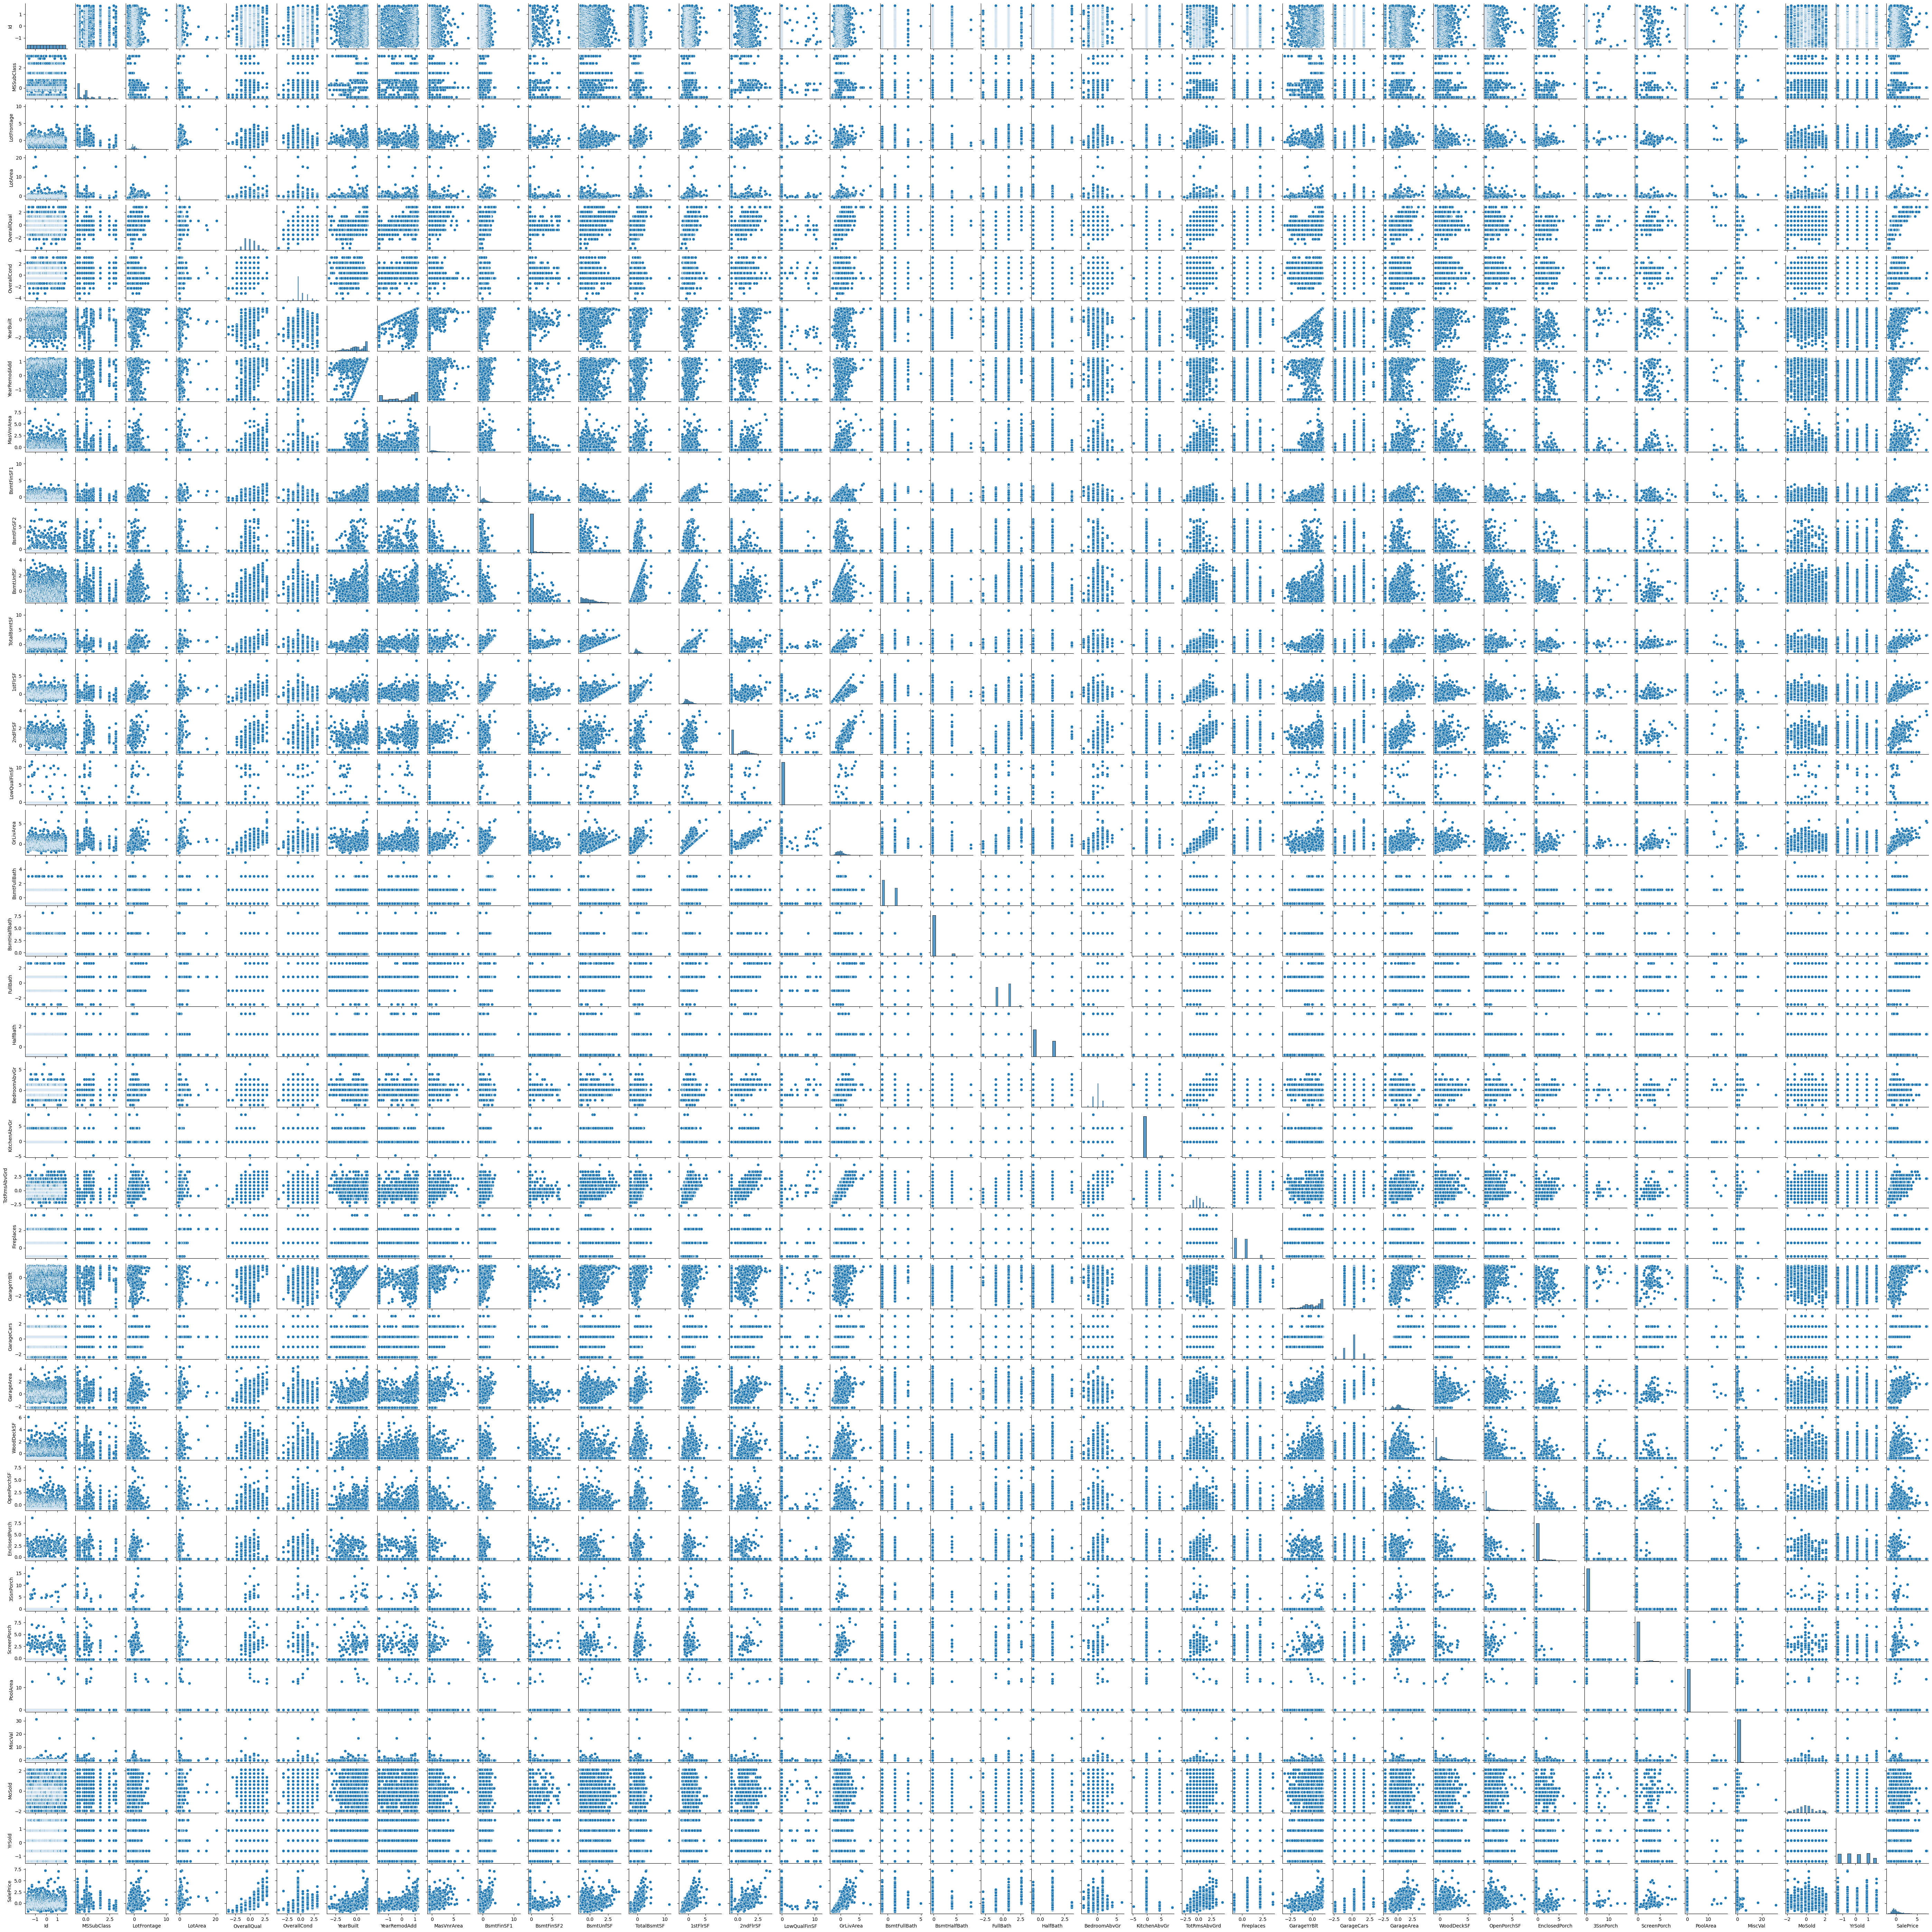

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the pairplot
sns.pairplot(trainDf, height=1.5)
plt.show()

#NUMERICAL FEATURE CORRELATION

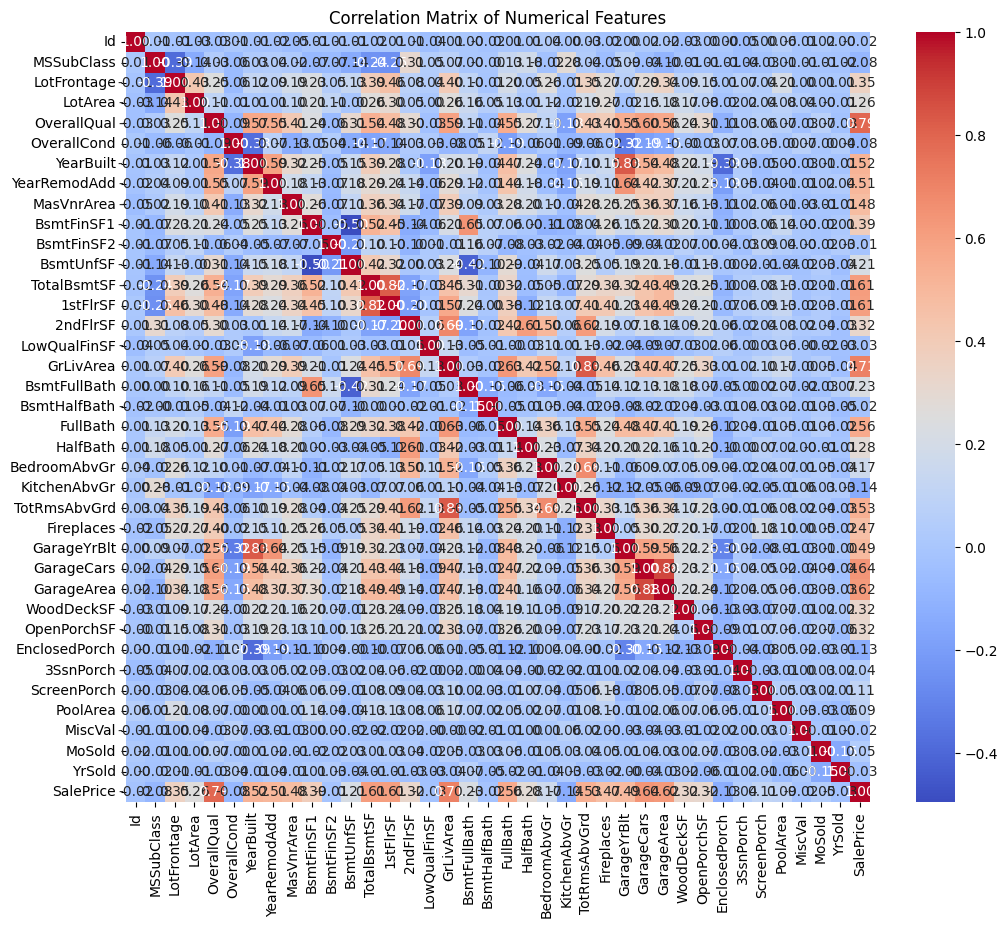

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in 'trainDf'

# 1. Select Numerical Features
numerical_features = trainDf.select_dtypes(include=['number']).columns

# 2. Calculate Correlation Matrix
correlation_matrix = trainDf[numerical_features].corr()

# 3. Visualize using Heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#HANDLING MISSING VALUES

In [45]:
# Calculate and display the amount of missing values in each column
missing_values_per_column = trainDf.isnull().sum()

print("Amount of Missing Values in Each Column:\n")
print(missing_values_per_column)

Amount of Missing Values in Each Column:

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [46]:
# 1. Identify numerical features (you might need to adjust this based on your data)
numerical_features = trainDf.select_dtypes(include=['number']).columns

# 2. Calculate median for each numerical feature (ignoring missing values)
medians = trainDf[numerical_features].median(skipna=True)

# 3. Replace missing values with medians
trainDf[numerical_features] = trainDf[numerical_features].fillna(medians)

#DISPLAYING TOP FEATURES

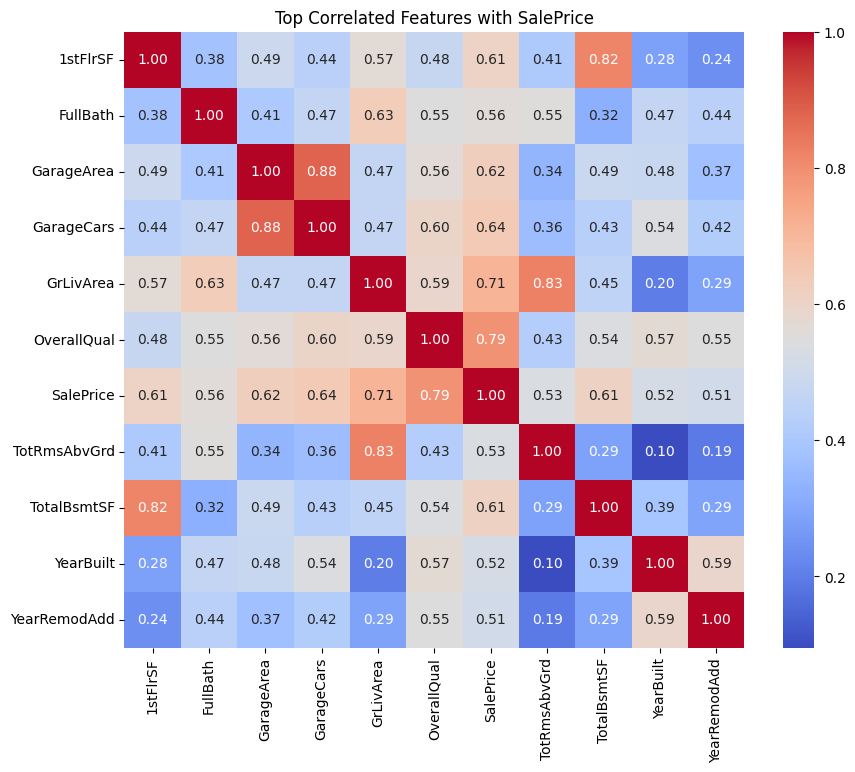

In [49]:
# 1. Select Numerical Features
numerical_features = trainDf.select_dtypes(include=['number']).columns

# 2. Calculate Correlation Matrix
correlation_matrix = trainDf[numerical_features].corr()

# 2. Sort by correlation with 'SalePrice' (absolute value)
top_correlations = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)

# Select top 10 features (excluding 'SalePrice' itself)
top_features = top_correlations[1:11].index

# Create heatmap for top features
plt.figure(figsize=(10, 8))
sns.heatmap(trainDf[top_features.union(['SalePrice'])].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features with SalePrice')
plt.show()

#FEATURE ENGINEERING

In [50]:
# Create a new feature 'TotalSF'
trainDf['TotalSF'] = trainDf['TotalBsmtSF'] + trainDf['1stFlrSF'] + trainDf['2ndFlrSF']

# Create an interaction term between 'OverallQual' and 'GrLivArea'
trainDf['Qual_LivArea'] = trainDf['OverallQual'] * trainDf['GrLivArea']

#STANDARDIZATION

In [52]:
from sklearn.preprocessing import StandardScaler

# 1. Identify all numerical features (including new features)
numerical_features = trainDf.select_dtypes(include=['number']).columns

# 2. Create a StandardScaler object
scaler = StandardScaler()

# 3. Fit the scaler to all numerical features and transform the data
trainDf[numerical_features] = scaler.fit_transform(trainDf[numerical_features])

#CATEGORICAL ENCODING

In [53]:
# 1. Identify categorical features (you might need to adjust this based on your data)
categorical_features = trainDf.select_dtypes(include=['object', 'category']).columns

# 2. Apply one-hot encoding using pandas `get_dummies`
trainDf = pd.get_dummies(trainDf, columns=categorical_features, drop_first=True)  # drop_first to avoid dummy variable trap

In [57]:
trainDf.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.050994      0.878668    0.514104    0.575425  ...           False   
1   0.156734     -0.429577   -0.570750    1.171992  ...           False   
2   0.984752      0.830215    0.325915    0.092907  ...           False   
3  -1.863632     -0.720298   -0.570750   -0.499274  ...           False   
4   0.951632      0.733308    1.366489    0.463568  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 248 columns]